In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Suppress any unnecessary warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the training dataset
data = pd.read_csv('Datasets/set2_500_patients.csv', sep=';')

# Display first few rows of the dataset to understand the structure
print(data.head())

   Unnamed: 0  day  hour  action  alertness  hypertension  intoxication  \
0           0    0     0  coffee   1.394465      0.114070           0.0   
1           1    0     1   sleep   0.774357      0.067966           0.0   
2           2    0     2   sleep   1.281268      0.040496           0.0   
3           3    0     3   sleep   1.123732      0.024128           0.0   
4           4    0     4   sleep   1.247691      0.014376           0.0   

   heart_attack  accident    smoker  overweight  family_history  goof_ball  \
0         False     False  0.671647    0.730691        0.322668   0.653565   
1         False     False  0.671647    0.730691        0.322668   0.653565   
2         False     False  0.671647    0.730691        0.322668   0.653565   
3         False     False  0.671647    0.730691        0.322668   0.653565   
4         False     False  0.671647    0.730691        0.322668   0.653565   

   subject  
0        0  
1        0  
2        0  
3        0  
4        0  


In [3]:
# Define features and target variable
X = data[['hour', 'hypertension', 'intoxication', 'smoker', 'overweight', 'family_history', 'goof_ball']]
y = data['accident'] | data['heart_attack']  # Combined target for accident or heart attack

# Split the dataset into training and validation sets (ensuring no subject contamination)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=data['subject'])

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

In [5]:
# Initialize the K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Perform 5-fold cross-validation
cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Average Cross-Validation Accuracy: {cv_scores.mean()}')

Cross-Validation Accuracy Scores: [0.99411455 0.9946595  0.9941871  0.99396912 0.99405995]
Average Cross-Validation Accuracy: 0.994198042601105


Confusion Matrix:
[[68140    95]
 [  267   311]]

Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     68235
        True       0.77      0.54      0.63       578

    accuracy                           0.99     68813
   macro avg       0.88      0.77      0.81     68813
weighted avg       0.99      0.99      0.99     68813

ROC-AUC Score: 0.9429814352648072


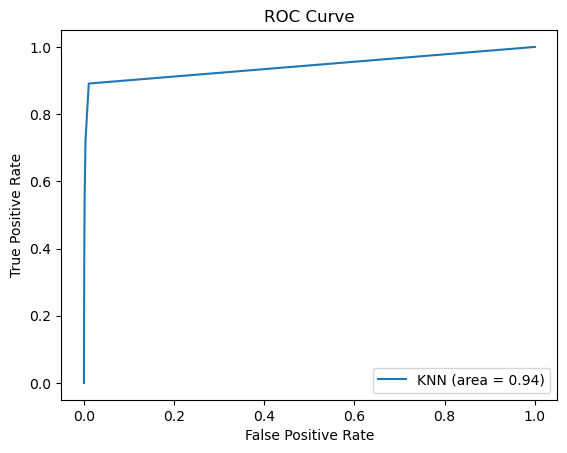

In [6]:
# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict on the validation data
y_pred = knn.predict(X_valid)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred))
print("\nClassification Report:")
print(classification_report(y_valid, y_pred))

# Compute ROC-AUC
y_pred_prob = knn.predict_proba(X_valid)[:, 1]
roc_auc = roc_auc_score(y_valid, y_pred_prob)
print(f'ROC-AUC Score: {roc_auc}')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_valid, y_pred_prob)
plt.plot(fpr, tpr, label=f'KNN (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()